   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa


(150, 5)


       species
0  Iris-setosa
1  Iris-setosa
2  Iris-setosa


   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2


   sepal_length  sepal_width  petal_length  petal_width
0     -0.897674     1.028611     -1.336794    -1.308593
1     -1.139200    -0.124540     -1.336794    -1.308593
2     -1.380727     0.336720     -1.393470    -1.308593


(150, 150)
(4,)
(4, 4)






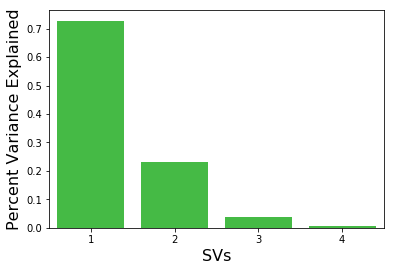

       Species       SV1       SV2
0  Iris-setosa -0.108375 -0.043020
1  Iris-setosa -0.099850  0.055755
2  Iris-setosa -0.113323  0.027093


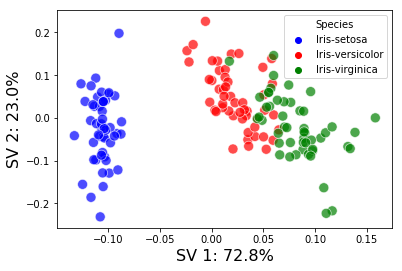

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("IRIS.csv")
print(data.head(3))
print("\n")


meta1 = data[data.species.isin(['Iris-setosa','Iris-virginica','Iris-versicolor'])]
print(meta1.shape)
print("\n")

meta=meta1.loc[:, meta1.columns.str.contains('^sp')]
print(meta.head(3))
print("\n")

data1=data.drop('species',axis=1)
print(data1.head(3))
print("\n")


data_scaled=(data1-data1.mean())/data1.std()
print(data_scaled.head(3))
print("\n")


u,s,v=np.linalg.svd(data_scaled,full_matrices=True)

print(u.shape)
print(s.shape)
print(v.shape)
print("\n")
print("\n")

var_explained=np.round(s**2/np.sum(s**2),decimals=3)

sns.barplot(x=list(range(1,len(var_explained)+1)),y=var_explained , color="limegreen")
plt.xlabel('SVs',fontsize=16)
plt.ylabel('Percent Variance Explained',fontsize=16)
plt.savefig('svd_scree_plot.png',dpi=100)
plt.show()

labels= ['SV'+str(i) for i in range(1,3)]
svd_df = pd.DataFrame(u[:,0:2], index=meta["species"].tolist(), columns=labels)
svd_df=svd_df.reset_index()
svd_df.rename(columns={'index':'Species'}, inplace=True)
print(svd_df.head(3))

color_dict = dict({'Iris-setosa':'Blue',
                   'Iris-versicolor': 'Red',
                    'Iris-virginica':'Green'})

sns.scatterplot(x="SV1", y="SV2", hue="Species", 
                palette=color_dict, 
                data=svd_df, s=100,
                alpha=0.7)

plt.xlabel('SV 1: {0}%'.format(var_explained[0]*100), fontsize=16)
plt.ylabel('SV 2: {0}%'.format(var_explained[1]*100), fontsize=16)
plt.show()


